# Assignment 4

Name : Harsha Singh


# Problem Statement

## Random Forest

The candidate with level 6.5 had a previous salary of 160000. In order to hire him in our new company, we would like to confirm if he is being honest about his last salary and we will can predict this using the Random Forest.

### "Agenda":

To be able to predict the salaries of the organisation and be able to decide the limit to be given.

In [1]:
#Import the essential libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read the dataset in csv file using pandas
Salaries_data = pd.read_csv("Datasets/Position_Salaries.csv")

In [3]:
Salaries_data.head(10)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
##Display the number of columns/rows
Salaries_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [5]:
# Get the statistical summary of the dataset
Salaries_data.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [6]:
#dimensions of dataset
Salaries_data.shape

(10, 3)

# Data Vizualization

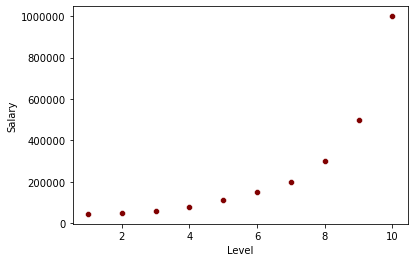

In [7]:
# Using seaborn plot a scatter plot
ax = sns.scatterplot(data=Salaries_data,x="Level",y="Salary",color='maroon')
ax.ticklabel_format(useOffset=False, style='plain')

From the above viz, we can see a positive correlation between the Level (Independent) and Salary (Dependent)

In [8]:
#Using corr function also gives moderately high correlation value of 0.8179.Hence level and Salary are positively correlated with
# correlation co-efficient of 0.8179
Salaries_data.corr()

,Level,Salary
Level,1.000000,0.817949
Salary,0.817949,1.000000


In this dataset, no NA values,no missing values and also no duplicate values.So let's proceed after vizualisation to model building

New hire whose level is 6.5 lies between levels 6 and levels 7, we will try to predict new salary when told his current salary is 16,000


# Random Forest Algorithm Building

In [9]:
# X and Y From dataset
X = Salaries_data['Level'].values.reshape(-1, 1)
y = Salaries_data['Salary'].values.reshape(-1, 1)
X.shape
y.shape

(10, 1)

In [10]:
# X and Y From dataset
X = Salaries_data.iloc[:, 1:2].values
y = Salaries_data.iloc[:, 2].values

X = Salaries_data.Level.values.reshape(-1, 1)
y = Salaries_data.Salary.values.reshape(-1, 1)

In [11]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [12]:
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

In [13]:
#Split the available dataset to training and testing dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)

# X_train contains 70% of total dataset
print(X_train.shape)
print(y_train.shape)
# X_test contains 25% of total dataset
print(X_test.shape)
print(y_test.shape)

(7, 1)
(7, 1)
(3, 1)
(3, 1)


In [14]:
# X_train contains 70% of total dataset
print(X_train.reshape(-1, 1))
print(y_train)
# X_test contains 30% of total dataset
print(X_test)
print(y_test)

[[10]
 [ 2]
 [ 7]
 [ 8]
 [ 4]
 [ 1]
 [ 6]]
[[1000000]
 [  50000]
 [ 200000]
 [ 300000]
 [  80000]
 [  45000]
 [ 150000]]
[[3]
 [9]
 [5]]
[[ 60000]
 [500000]
 [110000]]


In [15]:
# Import random forest lib and instantiate an object
# Decide number of trees and pass as n_estimators parameter of RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=290,random_state=1)

In [16]:
# fit training data
forest.fit(X_train, y_train.ravel())

RandomForestRegressor(n_estimators=290, random_state=1)

In [17]:
# Find accuracy scores

In [18]:
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.926
Accuracy on test set: 0.990


The Testing set is showing more accuracy in the trained model. (After changing parameters, arrived at this value)

# Predictions

1. In given data the value for level 3 is 60,000 and we are just predicting by plugging in, We get 59396.55172414 which is approximately same implying we around 98-99% accurate

In [19]:
# FIND FOR LEVEL-3
y_pred = forest.predict([[3]])  
y_pred

array([59396.55172414])

In [20]:
# If level is 6.5
output= forest.predict([[6.5]])
output

array([173896.55172414])

In [21]:
# Hence the new hire gets 173896.55172414 as salary adding margin to his previous salary. This is the predicted value therefore

# Model Evaluation

In [22]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [23]:
y_train_pred= forest.predict(X_train)
y_train_pred

array([775689.65517241,  53603.44827586, 196137.93103448, 285344.82758621,
        78068.96551724,  51431.03448276, 161517.24137931])

In [24]:
rmse = (np.sqrt(mean_squared_error(X_train,y_train_pred)))
r2=r2_score(y_train,y_train_pred)

print(" The model performance of training set")
print("******--------------*******")
print("RMSE is {}".format(rmse))
print("R2 score is {}".format(r2))
print("\n")

n=10  # Number of observations
k=1    # Number of independent variables (here level explains variability of salary)
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print(adj_r2_score)
adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("Adjusted R Score is:",adj_r2_score)


 The model performance of training set
******--------------*******
RMSE is 329341.6719914941
R2 score is 0.9262158840157046


0.9169928695176677
Adjusted R Score is: 0.9169928695176677


In [25]:
y_test_pred= forest.predict(X_test)
y_test_pred

array([ 59396.55172414, 466724.13793103, 106724.13793103])

In [26]:
rmse = (np.sqrt(mean_squared_error(y_test,y_test_pred)))
r2=r2_score(y_test,y_test_pred)
mae=mean_absolute_error(y_test,y_test_pred)


print(" The model performance of testing set")
print("******--------------*******")
print("RMSE is",rmse)
print("R2 score is",r2)

print("\n")

n=10  # Number of observations
k=1    # Number of independent variables (here level explains variability of salary)
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print("Adjusted R Score is:",adj_r2_score)

 The model performance of testing set
******--------------*******
RMSE is 19307.843126126627
R2 score is 0.990364344469707


Adjusted R Score is: 0.9891598875284204


Note The Adjusted R Score is nearing 1 (0.989) as testing data gets predicted here in fine manner

The model also gets tended to get overfitted with different variations of parameters, as sample size is small and splitting leads to unique observations being splitted,
Hence reducing the votes in an ensemble of decision trees.